# Kohonen

In [ ]:
# Q1_graded
# Do not change the above line.


In [ ]:
# Q1_graded
# Do not change the above line.

# Type your code here
import numpy as np
# Collecting dataset 
from tensorflow import keras

(x_train, y_train), (_, _) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)

digits_image = []  

for digit in range (10):
  for i in range(len(x_train)):    
    if len(digits_image) == 500 * (digit+1) :
      break
    if y_train[i] == digit :
      digits_image.append(x_train[i])      

dataset = np.array(digits_image)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
dataset.shape
np.mean(dataset)

33.4865056122449

In [ ]:
# Q1_graded
# model
import numpy.random as random
import matplotlib.pyplot as plt
import math

np.random.seed(10)

class SOM :
  def __init__(self, dataset , width , height , init_lr , epochs):    
    # initializing weights 
    self.WIDTH = 20 
    self.HEIGHT = 20
    avg = np.mean(dataset)
    # self.input_kohonen_weights = np.ones((self.WIDTH,self.HEIGHT,28,28)) * avg
    self.input_kohonen_weights = random.rand(self.WIDTH,self.HEIGHT,28,28) * avg

    # getting data
    self.dataset = dataset

    self.initial_learning_rate = init_lr
    self.learning_rate = self.initial_learning_rate
    # self.lr_update_rate = 0.2

    self.initial_radius = np.max([self.WIDTH , self.HEIGHT]) / 2 
    self.radius = self.initial_radius
    # self.redius_update_rate = 0.1

    self.total_iterations = epochs

  def compute_distance (self, image1 , neuron):
    return np.linalg.norm(image1 - neuron)

  # find bmu
  def find_bmu(self , input_point):
    min = math.inf
    best_matching_unit = np.empty((28,28))
    min_i , min_j = 0,0
    for i in range(self.WIDTH):
      for j in range(self.HEIGHT):
        neuron = self.input_kohonen_weights[i][j]             
        dist = self.compute_distance(input_point , neuron)        
        if dist < min :
          min = dist 
          best_matching_unit = neuron
          min_i = i
          min_j = j
    return best_matching_unit, min_i, min_j , min

  def h(self, distance):    
    s = -1 * np.power(distance ,2)
    m = 2 * np.power(self.radius , 2)
    return np.exp(s / m )    

  # fit
  def start_fitting (self):     

    for t in range(self.total_iterations):      
      total_distance = 0 
      # We must choose randomly from our inputs 
      # Shuffle method from numpy is doing this 
      np.random.shuffle(dataset)

      for data_iterator in range(len(self.dataset)):
        
        best_matching_unit, min_i, min_j, min_distance = self.find_bmu(self.dataset[data_iterator])    
        total_distance += min_distance
        
        for i in range(self.WIDTH) :
          for j in range(self.HEIGHT):
            distance = np.linalg.norm(np.array([i,j]) - np.array([min_i,min_j]))
            # if distance < self.radius :

            diff = np.subtract(self.dataset[data_iterator],best_matching_unit )

            delta_weight = self.learning_rate * diff * self.h(distance)
            
            self.input_kohonen_weights[i][j] += delta_weight

      print("On epoch", t , "The Average distance is", total_distance / 5000)
      # decay learning rate
      self.learning_rate = self.initial_learning_rate * (1 - (t/self.total_iterations))
      print("learning rate: ",self.learning_rate)
      # decay radius
      self.radius = self.initial_radius * (1 - (t/self.total_iterations))
      print("radius ",self.radius)

In [ ]:
# Q1_graded
# Start model 

som = SOM(dataset,20,20,init_lr = 0.3,epochs = 60)
som.start_fitting()

On epoch 0 The Average distance is 1623.8267679062374
learning rate:  0.3
radius  10.0
On epoch 1 The Average distance is 1561.99807590725
learning rate:  0.295
radius  9.833333333333332
On epoch 2 The Average distance is 1539.1411573722821
learning rate:  0.29
radius  9.666666666666666
On epoch 3 The Average distance is 1526.9958619831732
learning rate:  0.285
radius  9.5
On epoch 4 The Average distance is 1511.278934218294
learning rate:  0.27999999999999997
radius  9.333333333333334
On epoch 5 The Average distance is 1492.2032544781189
learning rate:  0.27499999999999997
radius  9.166666666666666
On epoch 6 The Average distance is 1480.7261992806746
learning rate:  0.27
radius  9.0
On epoch 7 The Average distance is 1468.8161145637064
learning rate:  0.26499999999999996
radius  8.833333333333332
On epoch 8 The Average distance is 1457.5864932835389
learning rate:  0.26
radius  8.666666666666668
On epoch 9 The Average distance is 1444.8083684488915
learning rate:  0.255
radius  8.5
O

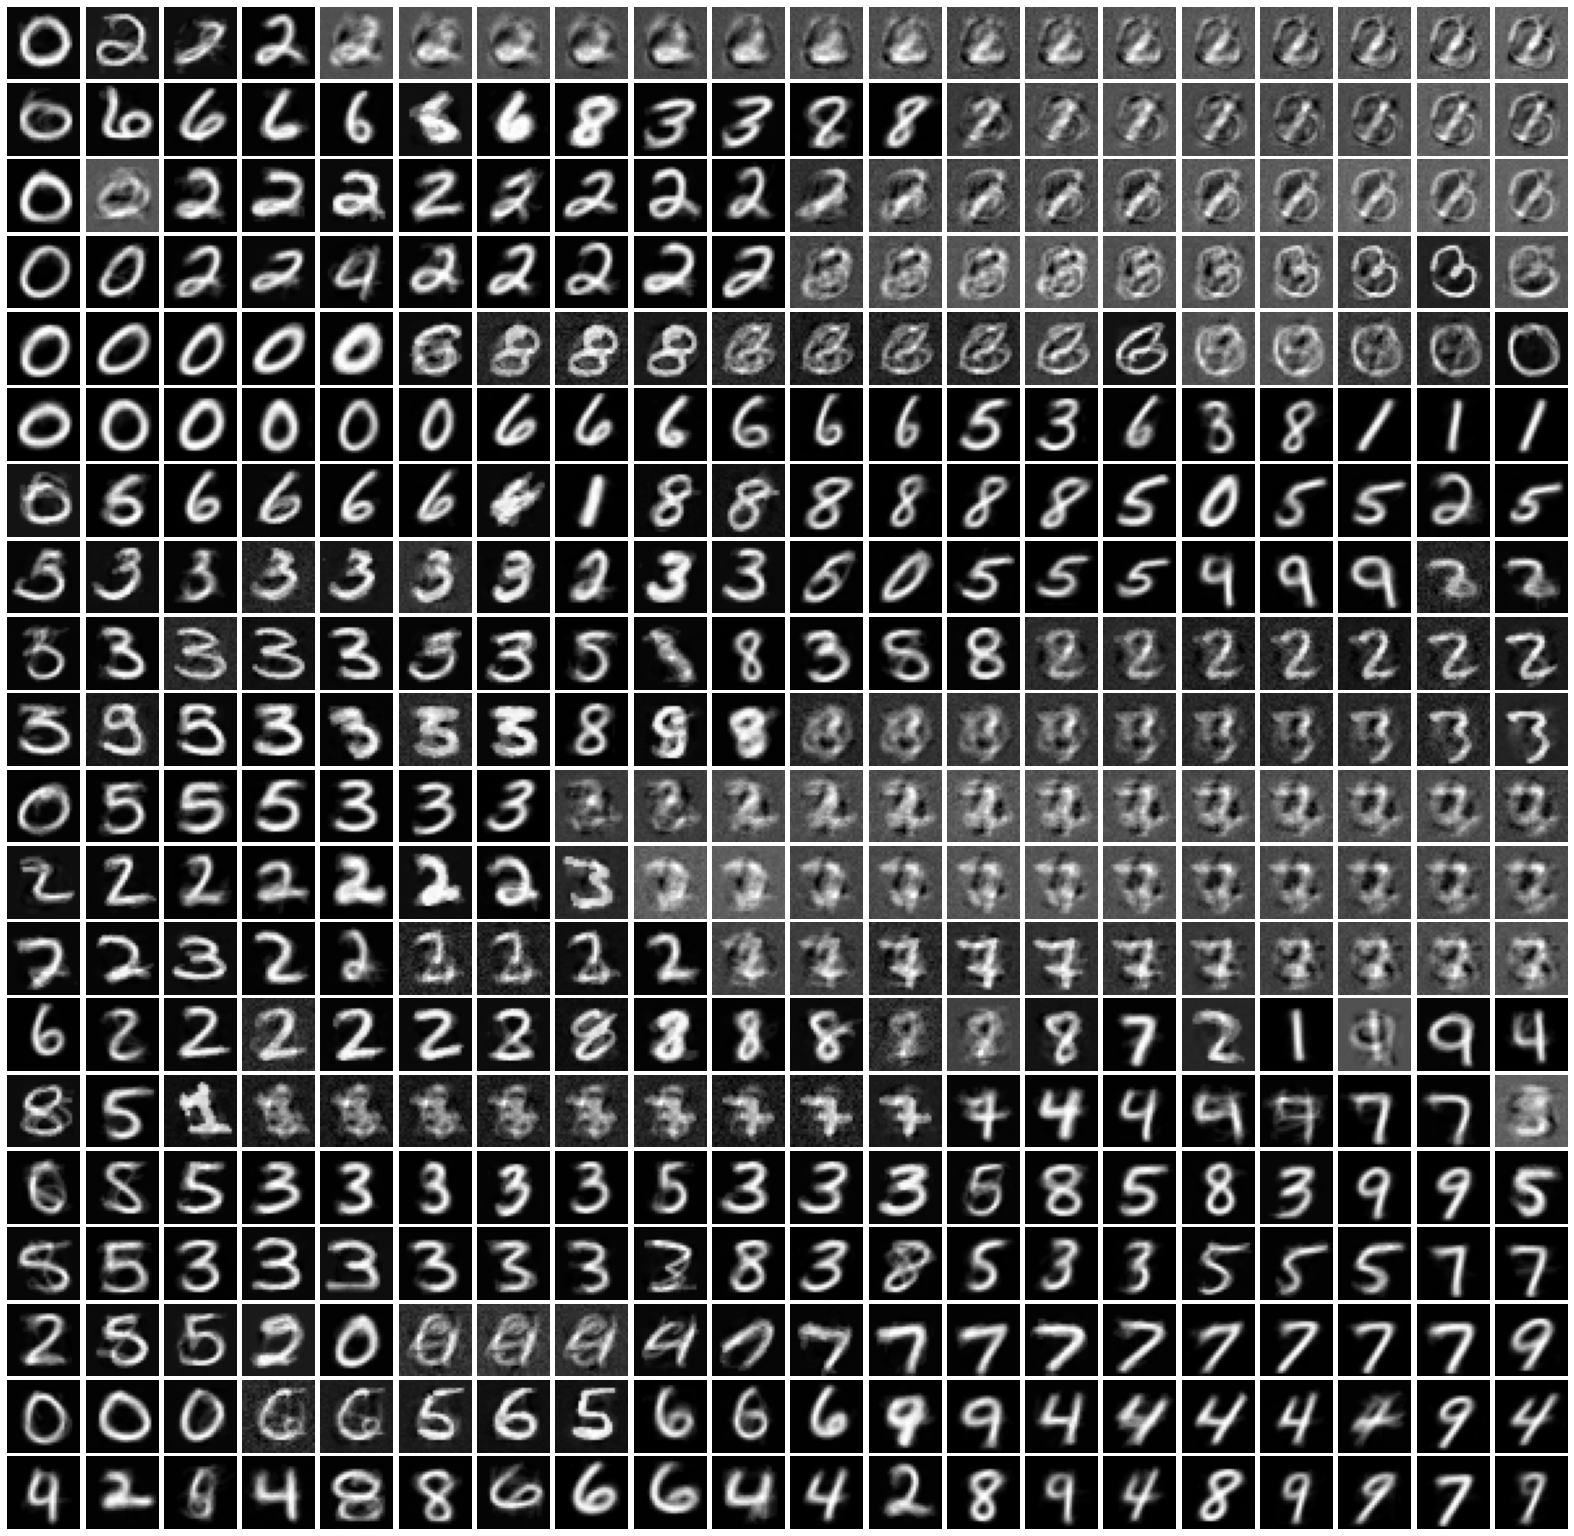

In [ ]:
# Q1_graded
import matplotlib.pyplot as plt

fig, ax = plt.subplots(20, 20, figsize=(28, 28))
for k in range(20):
  for j in range(20):
    ax[k][j].imshow(som.input_kohonen_weights[k][j], cmap='gray')
    ax[k][j].axis('off')
plt.subplots_adjust(hspace=0.05, wspace=0.05)